# Plot and compare all XAI result together

In [1]:
import numpy as np
from utils.utils import *
import matplotlib.pyplot as plt

In [2]:
# convert angle order to same angle sides next to each other
def space_trans(x):
    x_t = []
    for i in range(11):
        x_t.append(x[i])
        x_t.append(x[i+11])
    return np.array(x_t)

# List if angles name
# angles =  np.array(
# ['Pelvic tilt - 1st side','Pelvic tilt - 2nd side',
# 'Pelvic obliquity - 1st side','Pelvic obliquity - 2nd side',
# 'Pelvic rotation - 1st side',' Pelvic rotation - 2nd side',
# 'Hip F/E - 1st side','Hip F/E - 2nd side',
# 'Hip Ab/Ad - 1st side','Hip Ab/Ad - 2nd side',
# 'Hip Rot I/E - 1st side','Hip Rot I/E - 2nd side',
# 'Knee F/E - 1st side','Knee F/E - 2nd side',
# 'Knee Ab/Ad - 1st side','Knee Ab/Ad - 2nd side',
# 'Knee Rot I/E - 1st side','Knee Rot I/E - 2nd side',
# 'Ankle F/E - 1st side','Ankle F/E - 2nd side',
# 'Foot progression - 1st side','Foot progression - 2nd side'])
angles =  np.array(
['Pelvic tilt - more affected side','Pelvic tilt - less affected side',
'Pelvic obliquity - more affected side','Pelvic obliquity - less affected side',
'Pelvic rotation - more affected side','Pelvic rotation - less affected side',
'Hip F/E - more affected side','Hip F/E - less affected side',
'Hip Ab/Ad - more affected side','Hip Ab/Ad - less affected side',
'Hip Rot I/E - more affected side','Hip Rot I/E - less affected side',
'Knee F/E - more affected side','Knee F/E - less affected side',
'Knee Ab/Ad - more affected side','Knee Ab/Ad - less affected side',
'Knee Rot I/E - more affected side','Knee Rot I/E - less affected side',
'Ankle F/E - more affected side','Ankle F/E - less affected side',
'Foot progression - more affected side','Foot progression - less affected side'])

# Converting the order of accuracy per angle from ranked to natural ordering
def order_trans(order):
    order_transed = np.zeros(22)
    for c,i in enumerate(order):
        order_transed[i] = c
    return order_transed

In [2]:
# Load the ranking order of all XAI methods
import numpy as np
it_train_ResNet = np.load('./XAI_ranking/FS_forward_ResNet_TDvsCPu.npy')
it_train_LSTM = np.load('./XAI_ranking/FS_forward_LSTM_TDvsCPu.npy')
it_train_InceptionTime = np.load('./XAI_ranking/FS_forward_InceptionTime_TDvsCPu.npy')

it_train_ResNet_back = np.load('./XAI_ranking/FS_backward_ResNet_TDvsCPu.npy')
it_train_LSTM_back = np.load('./XAI_ranking/FS_backward_LSTM_TDvsCPu.npy')
it_train_InceptionTime_back = np.load('./XAI_ranking/FS_backward_InceptionTime_TDvsCPu.npy')

Lime_3_net = np.load('./XAI_ranking/'+'LIME'+'_'+'TDvsCPu'+'_weight.npy')
DeepShap_3_net = np.load('./XAI_ranking/'+'DeepShap'+'_'+'TDvsCPu'+'_weight.npy')
IG_3_net = np.load('./XAI_ranking/'+'IG'+'_'+'TDvsCPu'+'_weight.npy')

In [14]:
# Load the best accuracy of feature selection forward for each round
FS_resnet_ac = np.around(np.load('./FS_result/FS_forward_accuracy_ResNet.npy'),5)[order_trans(it_train_ResNet).astype(int)]
FS_lstm_ac = np.around(np.load('./FS_result/FS_forward_accuracy_LSTM.npy'),5)[order_trans(it_train_LSTM).astype(int)]
FS_InceptionTime_ac = np.around(np.load('./FS_result/FS_forward_accuracy_InceptionTime.npy'),5)[order_trans(it_train_InceptionTime).astype(int)]

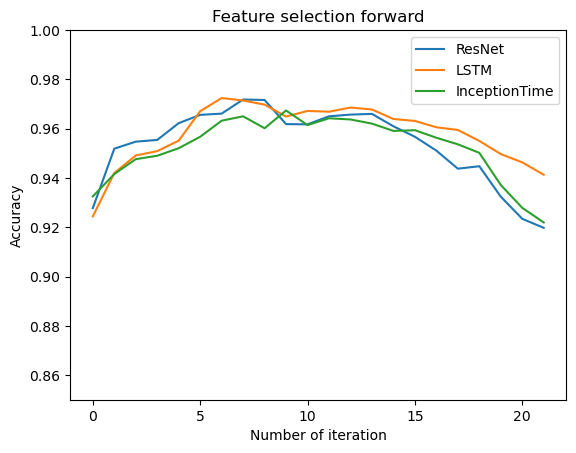

In [12]:
plt.plot(range(22),FS_resnet_ac[it_train_ResNet],label='ResNet')
# plt.plot(range(22),FS_resnet_ac_back,label='InceptionTime')
plt.plot(range(22),FS_lstm_ac[it_train_LSTM],label='LSTM')
plt.plot(range(22),FS_InceptionTime_ac[it_train_InceptionTime],label='InceptionTime')
plt.legend()
plt.ylim(0.85,1)
plt.xlabel('Number of iteration')
plt.ylabel('Accuracy')
plt.title('Feature selection forward')
plt.savefig('FS_forward_plot'+'.pdf', format="pdf",dpi=500)

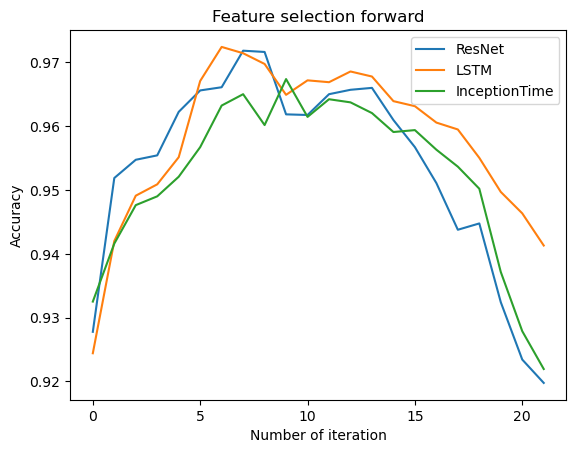

In [14]:
plt.plot(range(22),FS_resnet_ac[it_train_ResNet],label='ResNet')
# plt.plot(range(22),FS_resnet_ac_back,label='InceptionTime')
plt.plot(range(22),FS_lstm_ac[it_train_LSTM],label='LSTM')
plt.plot(range(22),FS_InceptionTime_ac[it_train_InceptionTime],label='InceptionTime')
plt.legend()
# plt.ylim(0.85,1)
plt.xlabel('Number of iteration')
plt.ylabel('Accuracy')
plt.title('Feature selection forward')
# plt.savefig('FS_forward_plot_ac_nature'+'.pdf', format="pdf",dpi=500)
plt.savefig('FS_forward_plot_ac_nature',dpi=500)

In [15]:
# Load the wrose accuracy of feature selection backward for each round
FS_resnet_ac_back = np.around(np.append(np.load('./FS_result/FS_backward_accuracy_ResNet.npy'),0),5)[order_trans(it_train_ResNet_back).astype(int)]
FS_LSTM_ac_back = np.around(np.append(np.load('./FS_result/FS_backward_accuracy_LSTM.npy'),0),5)[order_trans(it_train_LSTM_back).astype(int)]
FS_InceptionTime_ac_back = np.around(np.append(np.load('./FS_result/FS_backward_accuracy_InceptionTime.npy'),0),5)[order_trans(it_train_InceptionTime_back).astype(int)]

In [41]:
# Build the table for all ranking of angles prepare to plot
harvest = np.array([space_trans(order_trans(it_train_ResNet)),
                   space_trans(order_trans(it_train_LSTM)),
                   space_trans(order_trans(it_train_InceptionTime)),

                   # space_trans(order_trans(FS_first_resnet_ac_order)),
                   # space_trans(order_trans(FS_first_lstm_ac_order)),
                   # space_trans(order_trans(FS_first_InceptionTime_ac_order)),
                    
                   space_trans(order_trans(it_train_ResNet_back)),
                   space_trans(order_trans(it_train_LSTM_back)),
                   space_trans(order_trans(it_train_InceptionTime_back)),
                    
                   # space_trans(order_trans(FS_first_resnet_ac_order_back)),
                   # space_trans(order_trans(FS_first_lstm_ac_order_back)),
                   # space_trans(order_trans(FS_first_resnet_ac_order_back)),
                    
                   space_trans(order_trans(Lime_3_net[0])),
                   space_trans(order_trans(Lime_3_net[1])),
                   space_trans(order_trans(Lime_3_net[2])),
                   space_trans(order_trans(DeepShap_3_net[0])),
                   space_trans(order_trans(DeepShap_3_net[1])),
                   space_trans(order_trans(DeepShap_3_net[2])),
                   space_trans(order_trans(IG_3_net[0])),
                   space_trans(order_trans(IG_3_net[1])),
                   space_trans(order_trans(IG_3_net[2]))
                   #  ,
                   # np.arange(22)
                   ])

# harvest[-1][0] = harvest[:,]
# print(harvest[-1])
count_per_row = np.sum(harvest <=2, axis=0)
print(count_per_row)
harvest = harvest+1
harvest = np.vstack([harvest,15-np.array(count_per_row)])

[ 2  0  0  0  0  1 14  3  0  0  1  0 10  5  0  0  0  1  7  1  0  0]


In [32]:
# Add the accuracy after the ranking for feature selection
b_div = np.array([')' for _ in range(22)])
b_div = np.array([b_div for _ in range(6)])
b_div.shape
a_div = np.array([' (' for _ in range(22)])
a_div = np.array([a_div for _ in range(6)])
a_div.shape
ac_all = np.array([space_trans(FS_resnet_ac),space_trans(FS_lstm_ac),space_trans(FS_InceptionTime_ac),space_trans(FS_resnet_ac_back),space_trans(FS_LSTM_ac_back),space_trans(FS_InceptionTime_ac_back)])
no_ac = np.char.add(np.char.add(np.char.add(harvest[:6].astype(int).astype(str).T,a_div.T),np.around(ac_all,2).T.astype(str)),b_div.T)

In [33]:
np.char.add(np.array(count_per_row).astype(str),'/15')

array(['2/15', '0/15', '0/15', '0/15', '0/15', '1/15', '14/15', '3/15',
       '0/15', '0/15', '1/15', '0/15', '10/15', '5/15', '0/15', '0/15',
       '0/15', '1/15', '7/15', '1/15', '0/15', '0/15'], dtype='<U24')

### Plot and save the result of all XAI methods

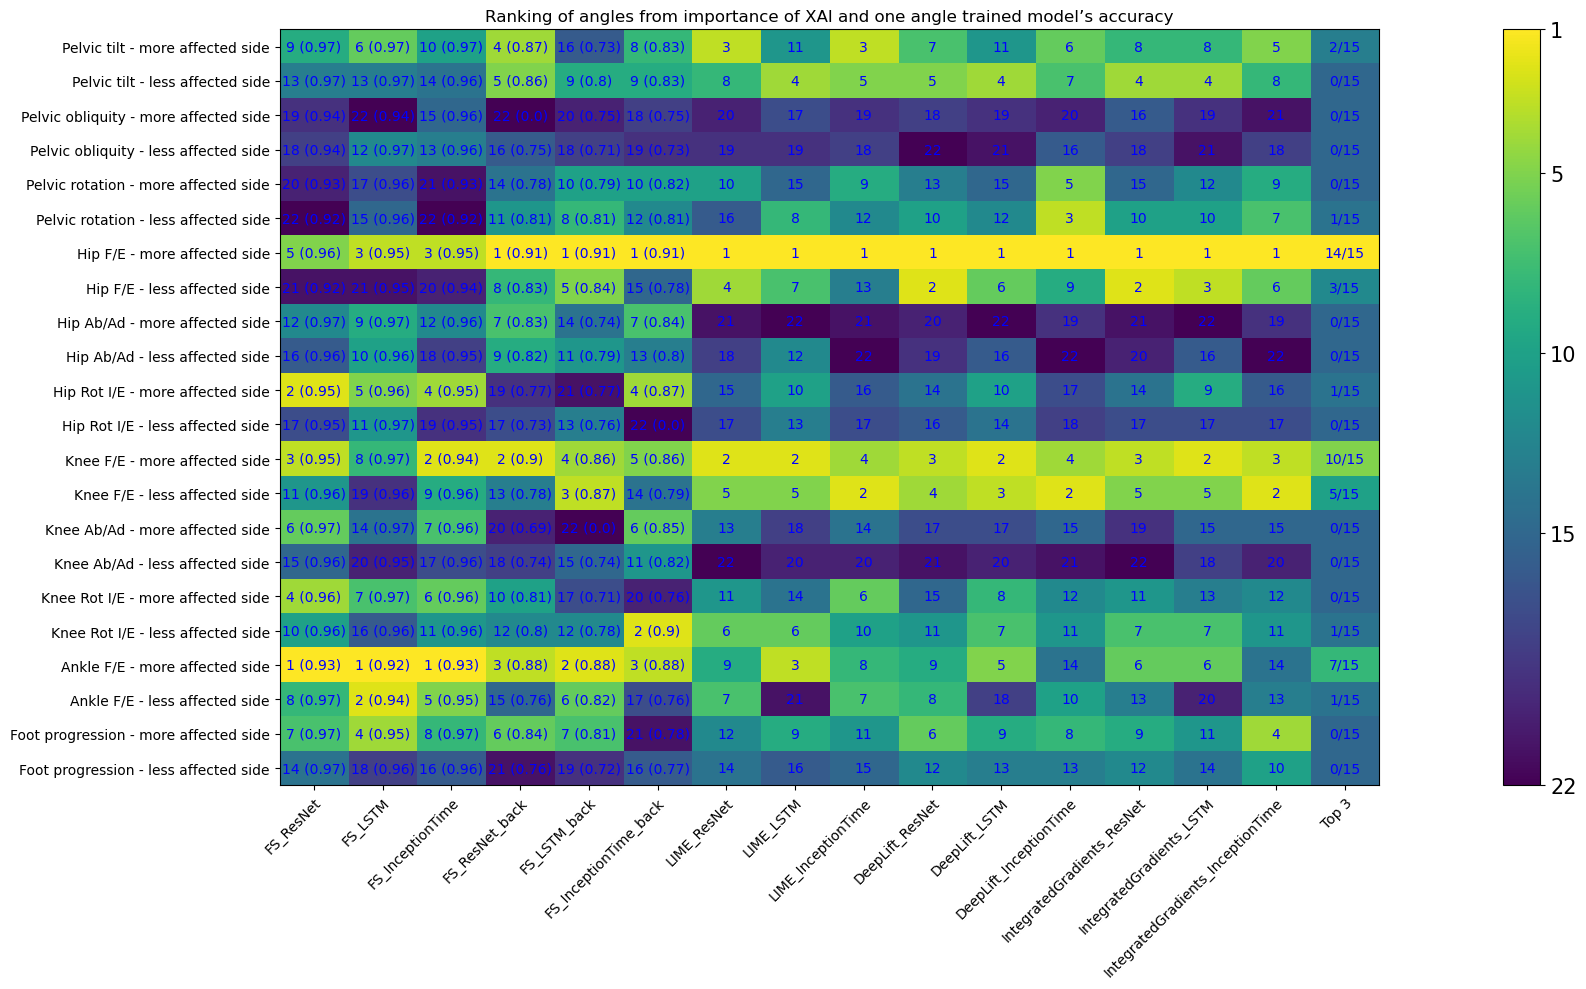

In [42]:

ranking = np.array(['FS_ResNet','FS_LSTM','FS_InceptionTime', 'FS_ResNet_back', 'FS_LSTM_back','FS_InceptionTime_back','LIME_ResNet','LIME_LSTM','LIME_InceptionTime','DeepLift_ResNet','DeepLift_LSTM','DeepLift_InceptionTime','IntegratedGradients_ResNet','IntegratedGradients_LSTM','IntegratedGradients_InceptionTime','Top 3'])


fig, ax = plt.subplots(figsize=(25, 10))

im = ax.imshow(harvest.T, interpolation='nearest',cmap='viridis_r',aspect = 0.5)


ax.set_xticks(np.arange(len(ranking)), labels=ranking,fontsize=10)
ax.set_yticks(np.arange(len(angles)), labels=angles,fontsize=10)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

harvest = harvest.astype(int).astype(str)

harvest[:6] = no_ac.T
harvest[-1] = np.char.add((np.array(count_per_row)).astype(str),'/15').T

for i in range(len(angles)):
    for j in range(len(ranking)):
        text = ax.text(j, i, harvest.T[i, j],
                       ha="center", va="center", color="b",fontsize=10)

ax.set_title("Ranking of angles from importance of XAI and one angle trained modelâ€™s accuracy")
fig.tight_layout()
fig.tight_layout()
cb = plt.colorbar(im, ax=ax)
cb.ax.tick_params(labelsize=15)
cb.ax.invert_yaxis()
cb.set_ticks([1, 5,10, 15, 22])

path_img = './XAI_plot/'
save='FS_all'
plt.savefig(path_img+save+'.pdf', format="pdf",bbox_inches = 'tight',facecolor ="w",dpi=500)